In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/train_BM.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.258700e+05,225870.000000,225870.000000,225869.000000,155760.000000,69140.000000,225869.000000
mean,1.002944e+06,8.087825,0.408492,5.292674,9.847304,12.655959,9318.725310
std,1.698480e+03,6.527166,0.491556,3.748076,5.085555,4.127783,4971.357354
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001463e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5860.000000
50%,1.002982e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004344e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.shape

(225870, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.Product_ID.value_counts(sort= True, ascending= False)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00287042       1
P00053242       1
P00338242       1
P00065942       1
P00074842       1
Name: Product_ID, Length: 3631, dtype: int64

In [7]:
# for c in categorical_feats:
#   train[c] = train[c].astype('category')

In [8]:
df.User_ID.value_counts(sort= True, ascending= False)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [9]:
df.Product_ID.isin(['P00265242']).value_counts()

False    548188
True       1880
Name: Product_ID, dtype: int64

In [10]:
# # missing value %age
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

# VIZ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a36883410>,
      dtype=object)

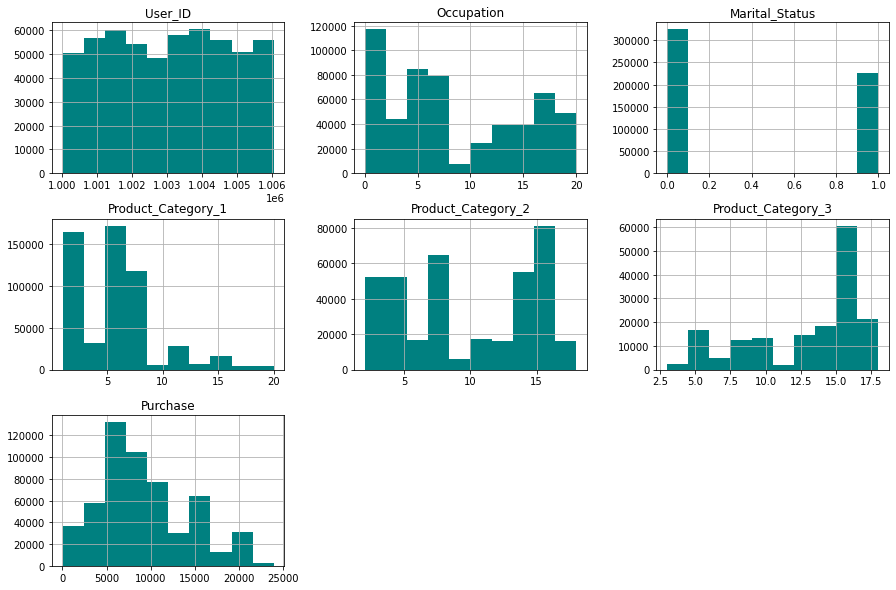

In [11]:
df.hist(figsize=(15,10), color = 'teal')

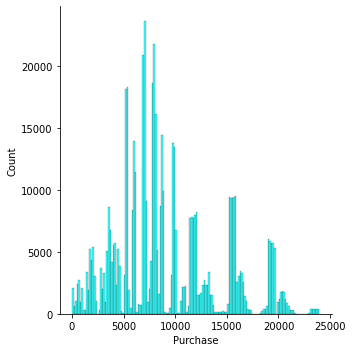

In [12]:
sns.displot(x= df.Purchase, color = 'cyan')

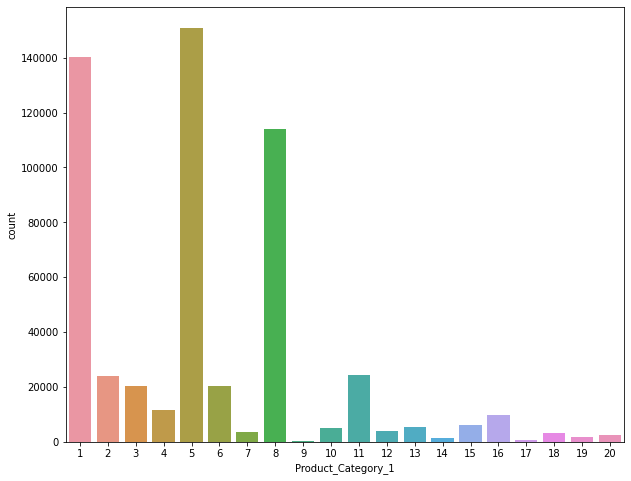

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_1',data=df)

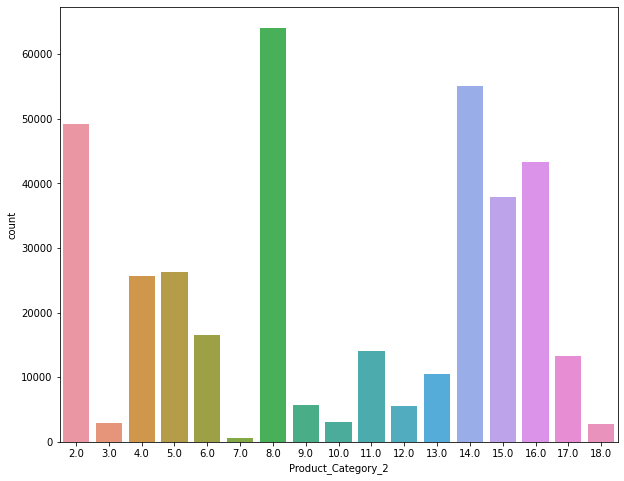

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_2',data=df)

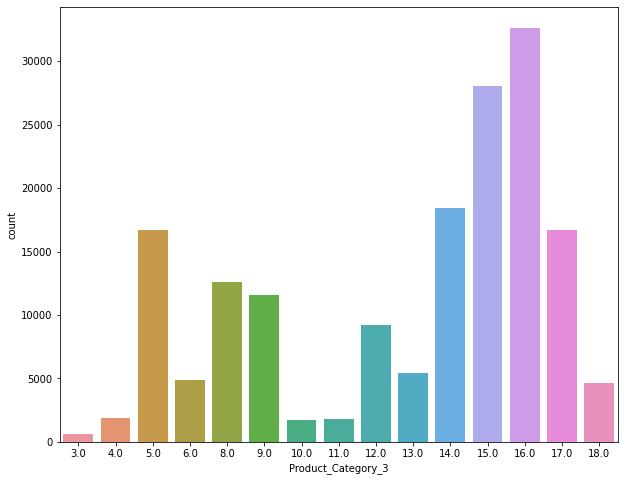

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_3',data=df)

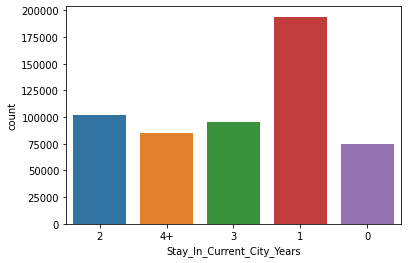

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'Stay_In_Current_City_Years',data=df)

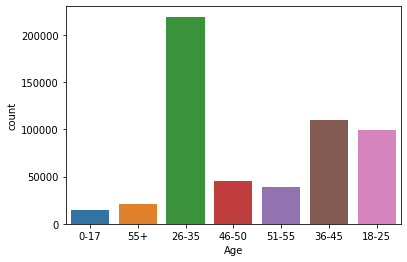

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'Age',data=df)

Text(0.5, 1.0, 'Age group vs Avg Purchase')

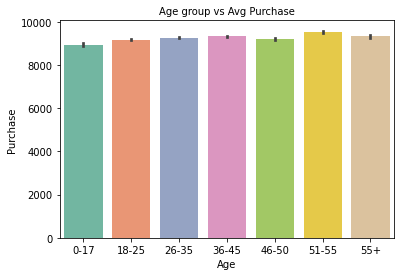

In [18]:
sns.barplot(x="Age",y="Purchase",estimator=np.mean,data=df, palette="Set2", order=["0-17", "18-25","26-35","36-45","46-50","51-55","55+"]).set_title(label = 'Age group vs Avg Purchase', size =10)

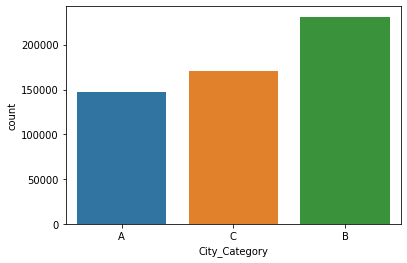

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'City_Category',data=df)

Text(0.5, 1.0, 'City Category vs Purchase Distribution')

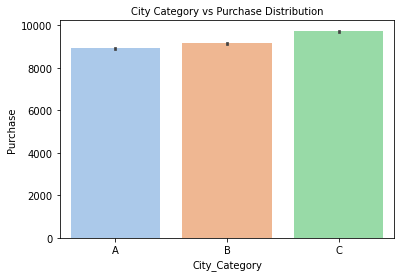

In [20]:
sns.barplot(x="City_Category",y="Purchase",estimator= np.mean,order=['A','B','C'],data= df, palette= 'pastel').set_title(label = 'City Category vs Purchase Distribution', size =10)

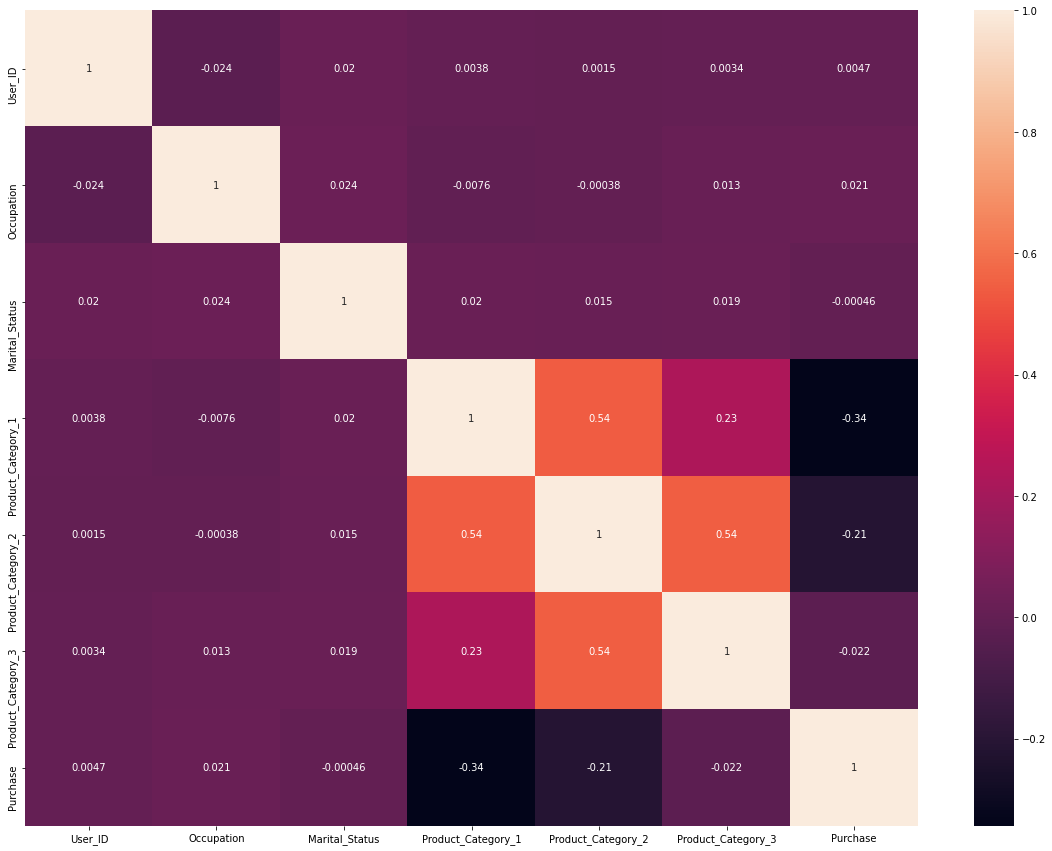

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

# DATA PReprocessing

In [6]:
df.fillna(0, inplace= True)

In [7]:
map_df=         {'Gender': {'M':1, 'F':0},
                'Age': {'0-17':9 ,'18-25':22,'26-35':31,'36-45':41,'46-50':48, '51-55':53, '55+': 60},
                'City_Category': {'A':1,'B':2,'C':3},
                'Stay_In_Current_City_Years':{'0':0,'1':1,'2':2,'3':3,'4+':4}
                }
                
df1= df.replace(map_df)
df1.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,9,10,1,2,0,3.0,0.0,0.0,8370.0
1,1000001,P00248942,0,9,10,1,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,9,10,1,2,0,12.0,0.0,0.0,1422.0
3,1000001,P00085442,0,9,10,1,2,0,12.0,14.0,0.0,1057.0
4,1000002,P00285442,1,60,16,3,4,0,8.0,0.0,0.0,7969.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225870 entries, 0 to 225869
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     225870 non-null  int64  
 1   Product_ID                  225870 non-null  object 
 2   Gender                      225870 non-null  int64  
 3   Age                         225870 non-null  int64  
 4   Occupation                  225870 non-null  int64  
 5   City_Category               225870 non-null  int64  
 6   Stay_In_Current_City_Years  225870 non-null  int64  
 7   Marital_Status              225870 non-null  int64  
 8   Product_Category_1          225870 non-null  float64
 9   Product_Category_2          225870 non-null  float64
 10  Product_Category_3          225870 non-null  float64
 11  Purchase                    225870 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 20.7+ MB


In [9]:
df1.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

In [10]:
df1.User_ID = df1.User_ID - 1000000
df1.User_ID.describe()

count    225870.000000
mean       2943.948811
std        1698.479818
min           1.000000
25%        1463.000000
50%        2982.000000
75%        4344.000000
max        6040.000000
Name: User_ID, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder
LA= LabelEncoder()
df1['Product_ID']= LA.fit_transform(df1['Product_ID'])
df1.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,643,0,9,10,1,2,0,3.0,0.0,0.0,8370.0
1,1,2291,0,9,10,1,2,0,1.0,6.0,14.0,15200.0
2,1,808,0,9,10,1,2,0,12.0,0.0,0.0,1422.0
3,1,784,0,9,10,1,2,0,12.0,14.0,0.0,1057.0
4,2,2643,1,60,16,3,4,0,8.0,0.0,0.0,7969.0


In [12]:
df1.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,643,0,9,10,1,2,0,3.0,0.0,0.0,8370.0
1,1,2291,0,9,10,1,2,0,1.0,6.0,14.0,15200.0
2,1,808,0,9,10,1,2,0,12.0,0.0,0.0,1422.0
3,1,784,0,9,10,1,2,0,12.0,14.0,0.0,1057.0
4,2,2643,1,60,16,3,4,0,8.0,0.0,0.0,7969.0


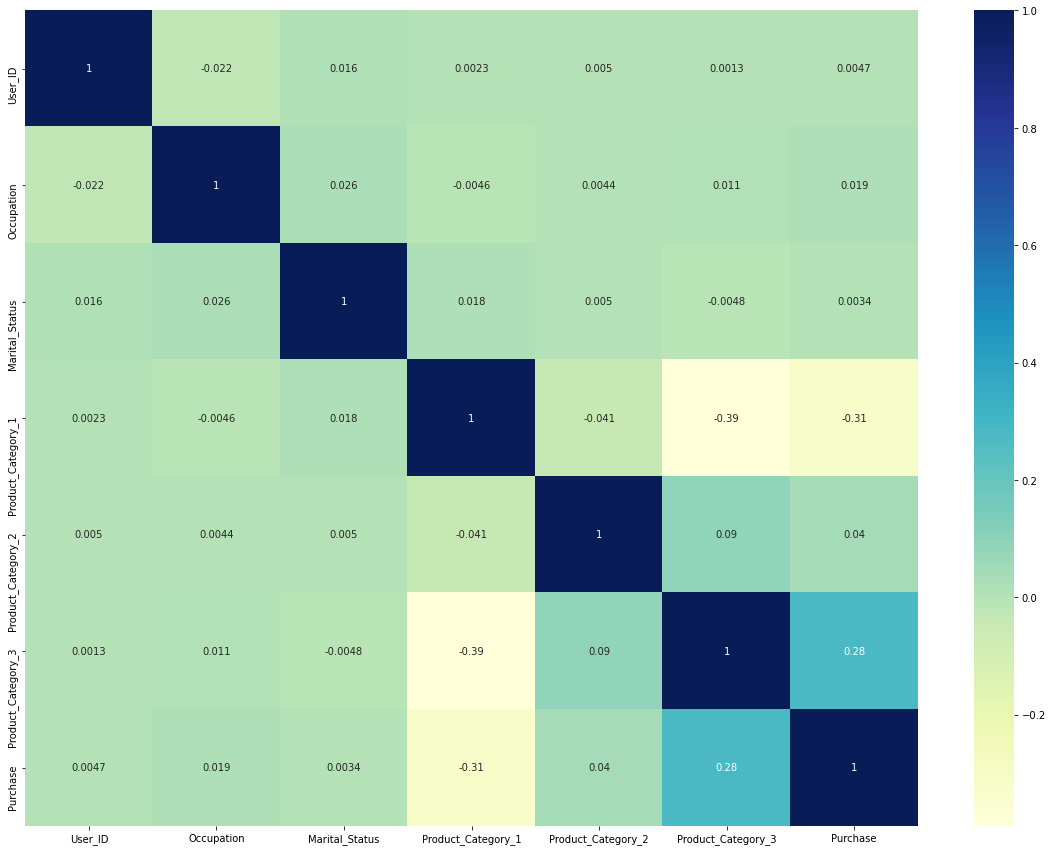

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap= 'YlGnBu')

VIF score of an independent variable represents how well the variable is explained by other independent variables.

**VIF= 1/(1-R^2)**

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_v = df1._get_numeric_data()

df_v = df_v.drop(['Purchase'], axis = 1)

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df_v.values, i) for i in range(df_v.shape[1])]

vif["features"] = df_v.columns

vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF Factor,features
0,3.663427,User_ID
1,3.526013,Product_ID
2,3.779149,Gender
3,9.953497,Age
4,2.562914,Occupation
5,7.004931,City_Category
6,2.894797,Stay_In_Current_City_Years
7,1.873237,Marital_Status
8,3.202331,Product_Category_1
9,2.145168,Product_Category_2


In [15]:
df2=df1.copy(deep= True)

In [24]:
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,643,0,9,10,1,2,0,3.0,0.0,0.0,8370.0
1,1,2291,0,9,10,1,2,0,1.0,6.0,14.0,15200.0
2,1,808,0,9,10,1,2,0,12.0,0.0,0.0,1422.0
3,1,784,0,9,10,1,2,0,12.0,14.0,0.0,1057.0
4,2,2643,1,60,16,3,4,0,8.0,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
225865,4800,1654,1,22,4,1,1,0,1.0,2.0,14.0,11606.0
225866,4800,1414,1,22,4,1,1,0,11.0,16.0,0.0,1625.0
225867,4800,178,1,22,4,1,1,0,8.0,0.0,0.0,3913.0
225868,4800,969,1,22,4,1,1,0,1.0,15.0,16.0,15397.0


In [53]:
from sklearn.model_selection import train_test_split
X_sig = df2.drop(['Purchase'], axis=1)
y_sig= df2['Purchase']

In [54]:
X_train ,X_test, y_train, y_test= train_test_split(X_sig,y_sig, test_size = 0.001 , random_state= 123)

In [55]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [56]:
X_train.shape

(225644, 11)

In [57]:
y_train.shape

(225644,)

In [58]:
print(X_train.size,X_test.size,y_train.size)

2482084 2486 225644


In [59]:
import statsmodels.api as sm
# building the model and fitting the data
# X_train = sm.add_constant(X_train)
model_ols = sm.OLS(y_train,X_train).fit()

# printing the summary table
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:               Purchase   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                          6.985e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        07:30:12   Log-Likelihood:                     -2.2435e+06
No. Observations:              225644   AIC:                                  4.487e+06
Df Residuals:                  225633   BIC:                                  4.487e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
y_pred = model_ols.predict(X_test)
from sklearn.metrics import mean_squared_error as MSE ,r2_score
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

### rmse = , r2 = 

RMSE :  4943.225758
R2: -0.04339839185117955


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set

    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(rmse) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmse)

RMSE value for k=  1 is: 4676.376355532569
RMSE value for k=  2 is: 4051.383304540529
RMSE value for k=  3 is: 3815.2518094122183
RMSE value for k=  4 is: 3846.8700640680613
RMSE value for k=  5 is: 3814.6022921242584
RMSE value for k=  6 is: 3837.072751367521
RMSE value for k=  7 is: 3819.1244353374577
RMSE value for k=  8 is: 3756.027653467755
RMSE value for k=  9 is: 3731.1520705502617
RMSE value for k=  10 is: 3735.123694217662
RMSE value for k=  11 is: 3739.4101900442615
RMSE value for k=  12 is: 3829.17078356239
RMSE value for k=  13 is: 3830.2027095645276
RMSE value for k=  14 is: 3836.2686050533916
RMSE value for k=  15 is: 3839.7494293478308
RMSE value for k=  16 is: 3829.0692787700477
RMSE value for k=  17 is: 3825.5490594196112
RMSE value for k=  18 is: 3826.385160150369
RMSE value for k=  19 is: 3850.9789796885148
RMSE value for k=  20 is: 3865.076753954593


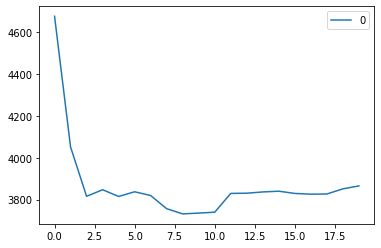

In [62]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

MODELS

In [63]:
#from sklearn.model_selection import train_test_split
X = df1.drop(['Purchase'], axis=1)
y= df['Purchase']
X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2 , random_state= 123)

In [64]:
# import the regressor 
from sklearn.linear_model import LinearRegression 

# create a regressor object 
regressor = LinearRegression(normalize = True)

# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 
y_pred= regressor.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

### rmse =  , r2 =

MSE: 20825780.27979372
RMSE: 4563.527175310093
R2: 0.14634929674829256


In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set

    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(rmse) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmse)

RMSE value for k=  1 is: 5752.3510418388705
RMSE value for k=  2 is: 5068.240831007627
RMSE value for k=  3 is: 4865.732459379609
RMSE value for k=  4 is: 4769.305332884582
RMSE value for k=  5 is: 4725.889155304637
RMSE value for k=  6 is: 4700.52835759252
RMSE value for k=  7 is: 4691.413190882874
RMSE value for k=  8 is: 4685.635890809449
RMSE value for k=  9 is: 4684.227502989533
RMSE value for k=  10 is: 4681.90655101333
RMSE value for k=  11 is: 4681.7381576886155
RMSE value for k=  12 is: 4680.106222494636
RMSE value for k=  13 is: 4679.750947123486
RMSE value for k=  14 is: 4682.2471281014095
RMSE value for k=  15 is: 4685.154195990984
RMSE value for k=  16 is: 4689.810512179811
RMSE value for k=  17 is: 4692.949989727407
RMSE value for k=  18 is: 4696.24174648095
RMSE value for k=  19 is: 4698.588013597516
RMSE value for k=  20 is: 4700.143529436572


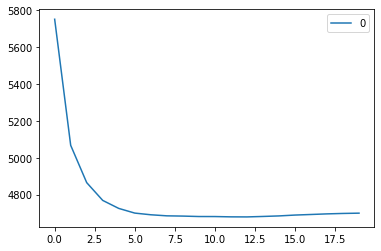

In [66]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [67]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor() 

# fit the regressor with X and Y data 
model2= regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
mse =mean_squared_error(y_test, y_pred)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

### rmse = 3719  , r2 = 0.45

MSE: 14530420.389626777
RMSE: 3811.8788529577873
R2: 0.4043966940253002


In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators=200)
model_rf= reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

# from sklearn.metrics import mean_squared_error,r2_score
mse =mean_squared_error(y_test, y_pred)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

### rmse = 2873.01  , r2 = 0.67

MSE: 7578386.709801297
RMSE: 2752.8869773024276
R2: 0.6893612120448556


In [78]:
import xgboost as xg
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
xgb_r= xg.XGBRegressor(objective ='reg:squarederror',eval_metric= 'rmse',learning_rate = 0.02, n_estimators= 500)
# Fitting the model 
modelXGB= xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

# from sklearn.metrics import mean_squared_error as MSE , r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

####RMSE= 2913.05, R2= 0.66

RMSE :  2910.065256
R2: 0.6528762123270169


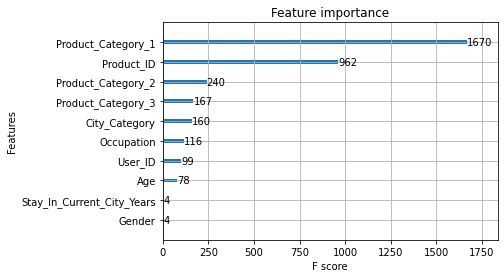

In [79]:
from xgboost import plot_importance
plot_importance(xgb_r)
plt.show()

In [80]:
import lightgbm
from lightgbm import LGBMRegressor
reg_lgbm = LGBMRegressor(metric = 'rmse')
model_lgbm= reg_lgbm.fit(X_train, y_train)
y_pred = reg_lgbm.predict(X_test)

# from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

### rmse = 2763.01  , r2 = 0.697

MSE: 7535567.503155499
RMSE: 2745.0988148253423
R2: 0.6911163753748619


In [81]:
categorical_columns = ["Product_ID","Gender", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3"]

In [82]:
lgb = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, num_leaves = 500, num_iterations =200,  random_state=0 )
param_test ={'learning_rate' : [0.05,0.1,0.2,0.3]}

Total_sets = 100

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=Total_sets,
    cv=5,
    refit=True,
    random_state=321,
    n_jobs = 4,
    verbose=True)
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(1*gs.best_score_, gs.best_params_))
y_pred  = gs.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)


### rmse = 2615.75  , r2 = 0.729

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Best score reached: 0.7206509051415283 with params: {'learning_rate': 0.05} 
MSE: 6759133.307563047
RMSE: 2599.8333230349685
R2: 0.7229424864828937


In [83]:
lgb = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, num_leaves = 500, num_iterations =200,  random_state=0,learning_rate = 0.1)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


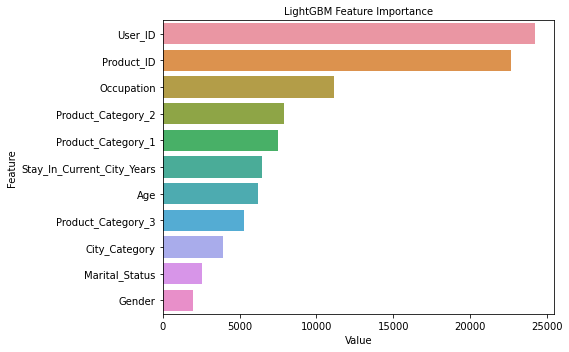

In [85]:
sorted(zip(lgb.feature_importances_, X_train.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(8,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(label= 'LightGBM Feature Importance', size = 10)
plt.tight_layout()
plt.show()

In [86]:
print('Predicted_Labels:',(y_pred)[:10])
print('Actual Labels:' ,  y_test[:10])

Predicted_Labels: [ 5551.11230856  5023.79188798 17733.42934363  7326.49369883
 12046.32617679  6522.36049033 15137.52015844  5892.14098655
  7018.83015315  6713.63105499]
Actual Labels: 7726       7117.0
140511    16682.0
209041     1951.0
163647     6093.0
155048     2104.0
142639      753.0
9271      11430.0
109427     9894.0
204614    10036.0
24563      7185.0
Name: Purchase, dtype: float64


In [87]:
test_df = pd.read_csv('/content/test_BM.csv')

In [88]:
test_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [89]:
# # missing value %age
test_df.isnull().sum()/len(test_df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [90]:
test_df.Age.unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [91]:
test_df.User_ID = test_df.User_ID - 1000000
test_df.User_ID.describe()

count    233599.000000
mean       3029.356859
std        1726.504968
min           1.000000
25%        1527.000000
50%        3070.000000
75%        4477.000000
max        6040.000000
Name: User_ID, dtype: float64

In [92]:
#test_df.fillna(test_df.mean(), inplace= True)
test_df.fillna(0, inplace= True)
map_df_t=         {'Gender': {'M':1, 'F':0},
                'Age': {'0-17':9 ,'18-25':22,'26-35':31,'36-45':41,'46-50':48, '51-55':53, '55+': 60},
                'City_Category': {'A':1,'B':2,'C':3},
                'Stay_In_Current_City_Years':{'0':0,'1':1,'2':2,'3':3,'4+':4}
                }
                
df_t= test_df.replace(map_df_t)
df_t['Product_ID']= LA.fit_transform(df_t['Product_ID'])
df_t.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,4,1144,1,48,7,2,2,1,1,11.0,0.0
1,9,994,1,31,17,3,0,0,3,5.0,0.0
2,10,2672,0,41,1,2,4,1,5,14.0,0.0
3,10,1299,0,41,1,2,4,1,4,9.0,0.0
4,11,519,0,31,1,3,1,0,4,5.0,12.0
5,13,3240,1,48,1,3,3,1,2,3.0,15.0
6,13,1399,1,48,1,3,3,1,1,11.0,15.0
7,13,3437,1,48,1,3,3,1,2,4.0,9.0
8,15,1458,1,31,7,1,1,0,10,13.0,16.0
9,22,638,1,22,15,1,4,0,5,14.0,0.0


In [93]:
X_t= df_t
X_t.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,4,1144,1,48,7,2,2,1,1,11.0,0.0


In [94]:
final_pred = lgb.predict(X_t)
print(final_pred)

[15395.60937055 11521.00187925  7578.06430641 ...  8186.09224818
 17831.84689873  2256.98170472]


In [95]:
df3 = pd.read_csv('/content/test_BM.csv')
df3['Purchase']= final_pred
df3.head()
final_sub = df3[['Purchase','User_ID', 'Product_ID']]
final_sub.head()

,Purchase,User_ID,Product_ID
0,15395.609371,1000004,P00128942
1,11521.001879,1000009,P00113442
2,7578.064306,1000010,P00288442
3,3071.358677,1000010,P00145342
4,2439.725748,1000011,P00053842


In [96]:
final_sub.to_csv('Blackfriday_lgbm2.csv')